In [2]:
import datetime
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize
import requests
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
from textblob import TextBlob 
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from operator import itemgetter
import gensim.summarization
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis.gensim

In [3]:
df = pd.read_csv("BitcoinTweets.csv")

In [4]:
df.shape

(6081117, 6)

In [91]:
word = df['text'][2]
word
words = word_tokenize(word)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]
lowercase_words
' '.join(lowercase_words)

'from bitcoin white paper we define electronic coin chain digital signatures btc no segwit bcc yes http'

In [92]:
def sent_clean(sentence):
    words = word_tokenize(sentence)
    lowercase_words = [word.lower() for word in words
                       if word not in stopwords.words() and word.isalpha()]
    temp_text = ' '.join(lowercase_words)
    return temp_text

In [93]:
df['text'] = df['text'].apply(lambda x: sent_clean(x))

KeyboardInterrupt: 

In [66]:
df1 = df[0:1000].copy()

In [67]:
def combine():
    tweet1 = ''
    for i in range(0, len(df1)):
        tweet1 = tweet1 + '\n' + df1['text'][i]
    tweets = tweet1.replace('\n\n', ' ')
    tweets = tweets.replace('\n', ' ')
    tweets = ''.join(tweets)
    words = word_tokenize(tweets)
    lowercase = [word.lower() for word in words
                 if word not in stopwords.words() and word.isalpha()]
    tweets = ' '.join(lowercase)
    return tweets

In [68]:
def wordcloud():
    tweets = combine()
    print(tweets)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20, collocations=False).generate(tweets)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

bitcoin bitcoinfork hardfork bitcoincash bitcoin whats going digital currency blockchain digitalcurrency btc https goin from bitcoin white paper we define electronic coin chain digital signatures btc no segwit bcc yes http bitcoin what going digitalcurrency https found app called slidecoin pays bitcoin daily basis you download http go bcc go bitcoin bittrex bitcoincash bitcoin zona vendedores bitcoin splits two transaction volumes increase http bitcoin cash just mined first block making blockchain split official http bitcoin value falls alternative currency goes live https allaboutbtc bitcoin btc equal usd goldcoinjar explaining my avenues of alternative investment wealth http b http bitcoin btc equal usd goldcoinjar don bitcoin remains unaffected expected fall august blockchain btc ethereum money bch chinese centralized coin dev support scam bitcoin ethereum so bitcoincash bcc bch live goes no different bitcoin btc still number one took profit next entry jackson palmer amidst bitcoin 

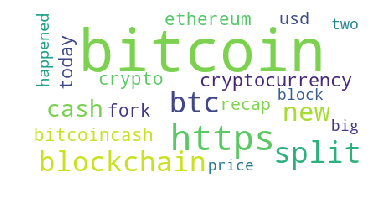

In [69]:
wordcloud()

In [70]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20, collocations=False).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    return None

In [71]:
def topic():
    text = combine()
    new_text = [nltk.word_tokenize(text)]
    dictionary = corpora.Dictionary(new_text) 
    corpus = [dictionary.doc2bow(text) for text in new_text]
    lda = LdaModel(corpus, id2word=dictionary, num_topics=5, passes=10)
    lda.get_document_topics(corpus,minimum_probability=0.05)
    sorted(lda.get_document_topics(corpus,minimum_probability=0),key=itemgetter(1),reverse=True)
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(lda.print_topics(num_words=8))
    draw_wordcloud(lda,4)
    return lda, corpus, dictionary

[   (   0,
        '0.002*"bitcoin" + 0.002*"http" + 0.001*"https" + 0.001*"blockchain" + '
        '0.001*"btc" + 0.001*"recap" + 0.001*"cash" + 0.001*"splits"'),
    (   1,
        '0.005*"bitcoin" + 0.002*"http" + 0.002*"https" + 0.001*"blockchain" + '
        '0.001*"btc" + 0.001*"cash" + 0.001*"news" + 0.001*"the"'),
    (   2,
        '0.127*"bitcoin" + 0.057*"http" + 0.025*"https" + 0.017*"btc" + '
        '0.014*"blockchain" + 0.011*"cash" + 0.010*"news" + 0.010*"split"'),
    (   3,
        '0.001*"bitcoin" + 0.001*"http" + 0.001*"https" + 0.001*"btc" + '
        '0.001*"cash" + 0.001*"blockchain" + 0.001*"cryptocurrency" + '
        '0.001*"what"'),
    (   4,
        '0.002*"bitcoin" + 0.001*"http" + 0.001*"https" + 0.001*"blockchain" + '
        '0.001*"btc" + 0.001*"split" + 0.001*"cash" + 0.001*"splits"')]


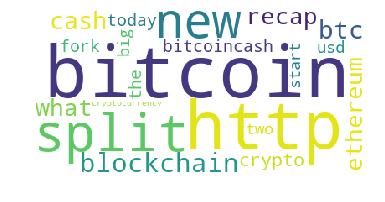

In [72]:
lda, corpus, dictionary = topic()

In [73]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/SubhamKedia/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
